<a href="https://colab.research.google.com/github/harishshaji/House_price_prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd



In [2]:
df=pd.read_csv('/content/houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

                                         

In [3]:
df=pd.DataFrame(df)


In [4]:
#1
#lst = [0,60, 'RL', 65, 8450, 'Pave', 2003, 'Reg', 856, 854]
#df = df.append(pd.DataFrame([lst], 
#     columns=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea","Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]),
#     ignore_index=True)
df.tail()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
1455,60,RL,62.0,7917,Pave,Reg,1999,953,694,175000
1456,20,RL,85.0,13175,Pave,Reg,1978,2073,0,210000
1457,70,RL,66.0,9042,Pave,Reg,1941,1188,1152,266500
1458,20,RL,68.0,9717,Pave,Reg,1950,1078,0,142125
1459,20,RL,75.0,9937,Pave,Reg,1965,1256,0,147500


In [5]:
for i in df.columns:
   print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

    

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [6]:
import datetime
datetime.datetime.now().year
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']
df.drop("YearBuilt",axis=1,inplace=True)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [7]:
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#lbl_encoders={}
#lbl_encoders["MSSubClass"]=LabelEncoder()
#lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [9]:
#lbl_encoders

In [10]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])


In [11]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,19
1,0,3,80.0,9600,1,3,1262,0,181500,46
2,5,3,68.0,11250,1,0,920,866,223500,21
3,6,3,60.0,9550,1,0,961,756,140000,107
4,5,3,84.0,14260,1,0,1145,1053,250000,22
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,23
1456,0,3,85.0,13175,1,3,2073,0,210000,44
1457,6,3,66.0,9042,1,3,1188,1152,266500,81
1458,0,3,68.0,9717,1,3,1078,0,142125,72


In [12]:
import numpy as np

cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)

cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [13]:
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [14]:
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [15]:
cont_features



['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [16]:
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values


tensor([[   65.,  8450.,   856.,   854.,    19.],
        [   80.,  9600.,  1262.,     0.,    46.],
        [   68., 11250.,   920.,   866.,    21.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    81.],
        [   68.,  9717.,  1078.,     0.,    72.],
        [   75.,  9937.,  1256.,     0.,    57.]])

In [17]:
cont_values.dtype

torch.float32

In [18]:
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [20]:
cat_features.shape,cont_values.shape,y.shape


(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [21]:
#len(df['MSSubClass'].unique())


In [22]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]


In [23]:
cat_dims


[15, 5, 2, 4]

In [24]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]


In [25]:
embedding_dim


[(15, 8), (5, 3), (2, 1), (4, 2)]

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [27]:
cat_features


tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [28]:
cat_featuresz=cat_features[:4]
cat_featuresz


tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [29]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [30]:
embedding_val


[tensor([[ 2.0348, -0.7992, -0.3435,  ...,  0.8668, -0.6235,  2.2714],
         [ 1.0691,  0.3761,  1.3241,  ..., -0.3192,  0.7823,  0.9625],
         [ 2.0348, -0.7992, -0.3435,  ...,  0.8668, -0.6235,  2.2714],
         ...,
         [ 1.7069,  0.0973, -0.1508,  ...,  0.0422,  0.9257, -0.5103],
         [ 1.0691,  0.3761,  1.3241,  ..., -0.3192,  0.7823,  0.9625],
         [ 1.0691,  0.3761,  1.3241,  ..., -0.3192,  0.7823,  0.9625]],
        grad_fn=<EmbeddingBackward0>), tensor([[1.2190, 0.3669, 0.0186],
         [1.2190, 0.3669, 0.0186],
         [1.2190, 0.3669, 0.0186],
         ...,
         [1.2190, 0.3669, 0.0186],
         [1.2190, 0.3669, 0.0186],
         [1.2190, 0.3669, 0.0186]], grad_fn=<EmbeddingBackward0>), tensor([[-0.2375],
         [-0.2375],
         [-0.2375],
         ...,
         [-0.2375],
         [-0.2375],
         [-0.2375]], grad_fn=<EmbeddingBackward0>), tensor([[ 2.4923, -1.0080],
         [ 2.4923, -1.0080],
         [ 0.6454, -0.3709],
         ...,


In [31]:
z = torch.cat(embedding_val, 1)
z

tensor([[ 2.0348, -0.7992, -0.3435,  ..., -0.2375,  2.4923, -1.0080],
        [ 1.0691,  0.3761,  1.3241,  ..., -0.2375,  2.4923, -1.0080],
        [ 2.0348, -0.7992, -0.3435,  ..., -0.2375,  0.6454, -0.3709],
        ...,
        [ 1.7069,  0.0973, -0.1508,  ..., -0.2375,  2.4923, -1.0080],
        [ 1.0691,  0.3761,  1.3241,  ..., -0.2375,  2.4923, -1.0080],
        [ 1.0691,  0.3761,  1.3241,  ..., -0.2375,  2.4923, -1.0080]],
       grad_fn=<CatBackward0>)

In [32]:
droput=nn.Dropout(.4)

In [33]:

final_embed=droput(z)
final_embed



tensor([[ 0.0000, -1.3319, -0.0000,  ..., -0.3959,  0.0000, -0.0000],
        [ 1.7819,  0.6268,  0.0000,  ..., -0.3959,  4.1538, -1.6801],
        [ 3.3913, -0.0000, -0.5725,  ..., -0.3959,  1.0756, -0.6182],
        ...,
        [ 2.8449,  0.1621, -0.2513,  ..., -0.3959,  4.1538, -0.0000],
        [ 0.0000,  0.6268,  0.0000,  ..., -0.0000,  4.1538, -1.6801],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.3959,  4.1538, -0.0000]],
       grad_fn=<MulBackward0>)

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [49]:
len(cont_features)


5

In [50]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [51]:

model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [52]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [53]:

df.shape

(1201, 10)

In [54]:
cont_values.shape


torch.Size([1201, 5])

In [55]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]


In [ ]:
test_categorical

In [56]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [57]:
epochs=5200
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.75
Epoch number: 11 and the loss : 200493.46875
Epoch number: 21 and the loss : 200489.140625
Epoch number: 31 and the loss : 200482.640625
Epoch number: 41 and the loss : 200473.25
Epoch number: 51 and the loss : 200461.375
Epoch number: 61 and the loss : 200446.4375
Epoch number: 71 and the loss : 200429.421875
Epoch number: 81 and the loss : 200407.953125
Epoch number: 91 and the loss : 200383.421875
Epoch number: 101 and the loss : 200355.21875
Epoch number: 111 and the loss : 200322.0625
Epoch number: 121 and the loss : 200291.46875
Epoch number: 131 and the loss : 200252.109375
Epoch number: 141 and the loss : 200206.59375
Epoch number: 151 and the loss : 200162.046875
Epoch number: 161 and the loss : 200112.09375
Epoch number: 171 and the loss : 200058.890625
Epoch number: 181 and the loss : 200006.34375
Epoch number: 191 and the loss : 199946.953125
Epoch number: 201 and the loss : 199881.359375
Epoch number: 211 and the loss : 199815.26562

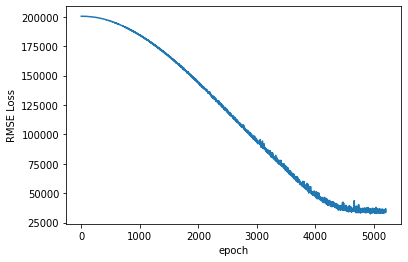

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
with torch.no_grad():
  plt.plot(range(epochs), final_losses)
  plt.ylabel('RMSE Loss')
  plt.xlabel('epoch')

In [59]:
test_categorical

tensor([[ 6,  2,  1,  3],
        [ 6,  3,  1,  3],
        [12,  3,  1,  3],
        [ 5,  3,  1,  1],
        [ 0,  3,  1,  3],
        [ 0,  3,  1,  0],
        [ 5,  3,  1,  3],
        [ 0,  3,  1,  3],
        [ 9,  3,  1,  3],
        [ 0,  3,  1,  3],
        [ 8,  3,  1,  3],
        [ 5,  1,  1,  3],
        [ 7,  4,  1,  3],
        [ 0,  3,  1,  3],
        [ 0,  3,  1,  3],
        [ 0,  3,  1,  3],
        [ 5,  3,  1,  3],
        [ 4,  4,  1,  3],
        [ 0,  3,  1,  0],
        [ 1,  3,  1,  3],
        [ 8,  3,  1,  0],
        [ 0,  3,  1,  3],
        [ 0,  3,  1,  3],
        [ 6,  3,  1,  3],
        [11,  2,  1,  3],
        [12,  1,  1,  3],
        [14,  4,  1,  0],
        [ 0,  3,  1,  0],
        [ 4,  3,  1,  3],
        [ 8,  3,  1,  0],
        [ 4,  3,  1,  3],
        [10,  3,  1,  3],
        [ 5,  3,  1,  3],
        [ 4,  0,  1,  3],
        [ 0,  3,  1,  0],
        [ 0,  3,  1,  0],
        [ 0,  3,  1,  0],
        [10,  3,  1,  3],
        [ 4,

In [61]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))
#print(test_categorical,test_cont)
#print(test_categorical)

RMSE: 43717.0859375


In [62]:
pca = test_categorical[-1]
pco = test_cont[-1]
pca = pca.resize_(2, 4)
pco = pco.resize_(2, 5)



In [ ]:
#u_t_c=torch.tensor([60,'RL','pave','Reg'],dtype=torch.str)

In [ ]:
#tc = [[0,  3,  1,  0]]
#tco = [[9.6000e+01, 1.3132e+04, 8.9200e+02, 8.9200e+02, 1.0800e+02]]
#import numpy as np


#cat_features=np.stack(tc,)
#cat_features

#cont_features=np.stack(tco,)
#cont_features

#cat_features=torch.tensor(cat_features,dtype=torch.int64)
#cat_features


#cont_features=torch.tensor(cat_features,dtype=torch.int64)
#cont_features

#tc = torch.Tensor(tc)
#tco = torch.Tensor(tco)
#y_pred=""


#y_pred=model(cat_features,cont_features)


#print(y_pred)
    

In [63]:
#y_test=y[batch_size-test_size:batch_size]

data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])


# y_test



In [64]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])


In [ ]:
# data_predicted


In [65]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
# final_output.head(25)

In [66]:
torch.save(model,'HousePrice.pt')

In [67]:
torch.save(model.state_dict(),'HouseWeights.pt')


In [68]:

### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [69]:
model1.load_state_dict(torch.load('HouseWeights.pt'))
ypredict = model1(pca,pco)
print(ypredict)
print(pca,pco)
data_predicted=pd.DataFrame(ypredict.tolist(),columns=["Prediction"])
print(data_predicted)
print(type(data_predicted))


tensor([[ 84092.2734],
        [255548.3438]], grad_fn=<AddmmBackward0>)
tensor([[0, 3, 1, 3],
        [0, 3, 1, 3]]) tensor([[  68., 9717., 1078.,    0.,   72.],
        [  75., 9937., 1256.,    0.,   57.]])
      Prediction
0   84092.273438
1  255548.343750
<class 'pandas.core.frame.DataFrame'>


In [70]:
model1.eval()


FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [ ]:
#import pickle